# Current PRS (Poligenic Risk Score)

In [33]:
import pandas as pd

In [34]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  

## Samples

Separação das amostras em casos e controles

In [35]:
phenotypes = pd.read_csv("data/datathon-pheno.tsv", sep="\t")
print(phenotypes.columns)
phenotypes = phenotypes[["s", "target_phenotype"]]
phenotypes.tail()

Index(['target_phenotype', 'bmi', 'age', 'sex', 'pc1', 'pc2', 'pc3', 'pc4',
       'pc5', 's'],
      dtype='object')


,s,target_phenotype
1087,Sample_160,0
1088,Sample_443,0
1089,Sample_326,0
1090,Sample_1080,0
1091,Sample_1323,0


In [36]:
vcf = pd.read_csv("data/target_cohort.vcf", sep="\t", comment="#", header=None)
vcf.columns = ["chr", "pos", "id", "ref", "alt", "qual", "filter", "info", "format"] + \
                [f"Sample_{s+1}" for s in range(len(vcf.columns[9:]))]
vcf = vcf.rename(columns={'chr': 'CHROM', 
                          'pos': 'POS', 
                          'ref': 'REF', 
                          'alt': 'ALT',
                          'Sample_2': 'Sample_02', 
                          'Sample_3': 'Sample_03',  
                          'Sample_4': 'Sample_04', 
                          'Sample_5': 'Sample_05'})
vcf.iloc[:10,10:]

Sample_02  \
0                                0/0:27,0:0:26:.:.:PASS:.:62:.:0,62,881:.:.   
1    0/1:14,19:0.576:33:6,9:8,10:PASS:50,7.5329e-05,51.351:48:.:85,0,48:.:.   
2                           0/0:38,1:0.026:37:.:.:PASS:.:96:.:0,96,1440:.:.   
3  0/1:21,16:0.432:37:11,5:10,11:PASS:48.509,8.2836e-05,53:47:.:83,0,50:.:.   
4                           0/0:39,1:0.025:34:.:.:PASS:.:81:.:0,81,1362:.:.   
5                               0/0:39,0:0:35:.:.:PASS:.:81:.:0,81,1394:.:.   
6                           0/0:42,1:0.023:35:.:.:PASS:.:80:.:0,80,1317:.:.   
7                               0/0:32,0:0:32:.:.:PASS:.:90:.:0,90,1350:.:.   
8                              0/0:39,0:0:37:.:.:PASS:.:99:.:0,102,1530:.:.   
9                               0/0:39,0:0:36:.:.:PASS:.:83:.:0,83,1346:.:.   

                                                                  Sample_03  \
0                               0/0:37,0:0:36:.:.:PASS:.:81:.:0,81,1271:.:.   
1            1/1:0,34:1:34:0,16:0,18:PASS:149.32,99.32,0:99:.:187,102,0:.:.   
2                               0/0:41,0:0:36:.:.:PASS:.:92:.:0,92,1440:.:.   
3    0/1:18,13:0.419:31:6,4:12,9:PASS:48.241,8.6978e-05,53:47:.:83,0,50:.:.   
4  0/1:17,22:0.564:39:5,11:12,11:PASS:50,7.3517e-05,51.606:48:.:85,0,49:.:.   
5                           0/0:36,1:0.027:34:.:.:PASS:.:90:.:0,90,1393:.:.   
6                               0/0:42,0:0:35:.:.:PASS:.:80:.:0,80,1386:.:.   
7                               0/0:41,0:0:37:.:.:PASS:.:82:.:0,82,1465:.:.   
8                               0/0:38,0:0:33:.:.:PASS:.:83:.:0,83,1401:.:.   
9                               0/0:29,0:0:29:.:.:PASS:.:81:.:0,81,1215:.:.   

                                                                   Sample_04  \
0   0/1:32,35:0.522:67:20,14:12,21:PASS:50,6.601e-05,52.819:48:.:85,0,50:.:.   
1                            0/0:52,5:0.088:39:.:.:PASS:.:80:.:0,80,1575:.:.   
2                             0/0:57,3:0.05:44:.:.:PASS:.:81:.:0,81,1619:.:.   
3         1/1:2,54:0.964:56:2,19:0,35:PASS:141.09,91.088,0:91:.:179,94,0:.:.   
4                                0/0:58,0:0:42:.:.:PASS:.:85:.:0,85,1710:.:.   
5   0/1:24,33:0.579:57:9,15:15,18:PASS:50,8.6978e-05,49.982:47:.:85,0,47:.:.   
6                                0/0:51,0:0:45:.:.:PASS:.:93:.:0,93,1620:.:.   
7                               0/0:60,0:0:49:.:.:PASS:.:99:.:0,110,1724:.:.   
8  0/1:41,29:0.414:70:19,16:22,13:PASS:45.511,0.00014393,53:45:.:80,0,50:.:.   
9                                0/0:55,0:0:45:.:.:PASS:.:86:.:0,86,1480:.:.   

                                                                  Sample_05  \
0                               0/0:51,0:0:42:.:.:PASS:.:89:.:0,89,1661:.:.   
1          1/1:0,53:1:53:0,30:0,23:PASS:206.52,156.52,0:157:.:244,160,0:.:.   
2  0/1:20,19:0.487:39:10,10:10,9:PASS:49.966,6.5492e-05,53:48:.:85,0,50:.:.   
3   0/1:22,34:0.607:56:12,18:10,16:PASS:50,0.00012425,47.3:45:.:85,0,44:.:.   
4  0/1:29,23:0.442:52:13,9:16,14:PASS:48.669,8.0765e-05,53:47:.:83,0,50:.:.   
5                               0/0:54,0:0:38:.:.:PASS:.:96:.:0,96,1575:.:.   
6                              0/0:58,0:0:55:.:.:PASS:.:99:.:0,120,1800:.:.   
7                           0/0:52,1:0.019:42:.:.:PASS:.:80:.:0,80,1694:.:.   
8                               0/0:64,0:0:47:.:.:PASS:.:93:.:0,93,1800:.:.   
9                               0/0:32,0:0:31:.:.:PASS:.:90:.:0,90,1350:.:.   

                                                                   Sample_6  \
0                            0/0:48,1:0.02:40:.:.:PASS:.:92:.:0,92,1620:.:.   
1   0/1:23,20:0.465:43:18,11:5,9:PASS:49.481,7.0669e-05,53:48:.:84,0,50:.:.   
2                               0/0:44,0:0:36:.:.:PASS:.:91:.:0,91,1443:.:.   
3  0/1:26,23:0.469:49:12,14:14,9:PASS:49.599,6.9375e-05,53:48:.:84,0,50:.:.   
4                               0/0:55,0:0:39:.:.:PASS:.:89:.:0,89,1620:.:.   
5   0/1:18,23:0.561:41:8,14:10,9:PASS:50,7.2481e-05,51.749:48:.:85,0,49:.:.   
6                     

In [37]:
controls = phenotypes[phenotypes["target_phenotype"] == 0]
print('Total Controls', len(controls))
controls.head()

Total Controls 349


,s,target_phenotype
743,Sample_971,0
744,Sample_1295,0
745,Sample_31,0
746,Sample_1107,0
747,Sample_40,0


In [38]:
cases = phenotypes[phenotypes["target_phenotype"] == 1]
print('Total Cases', len(cases))
cases.head()

Total Cases 743


,s,target_phenotype
0,Sample_62,1
1,Sample_1029,1
2,Sample_821,1
3,Sample_56,1
4,Sample_47,1


In [39]:
cases_samples = ['CHROM', 'POS', 'id', 'REF', 'ALT', 'qual', 'filter', 'info', 'format']
cases_samples.extend(cases.T.iloc[0].values)
cases_samples[:20]

['CHROM',
 'POS',
 'id',
 'REF',
 'ALT',
 'qual',
 'filter',
 'info',
 'format',
 'Sample_62',
 'Sample_1029',
 'Sample_821',
 'Sample_56',
 'Sample_47',
 'Sample_820',
 'Sample_49',
 'Sample_213',
 'Sample_818',
 'Sample_417',
 'Sample_762']

In [40]:
control_samples = ['CHROM', 'POS', 'id', 'REF', 'ALT', 'qual', 'filter', 'info', 'format']
control_samples.extend(controls.T.iloc[0].values)
control_samples[:20]

['CHROM',
 'POS',
 'id',
 'REF',
 'ALT',
 'qual',
 'filter',
 'info',
 'format',
 'Sample_971',
 'Sample_1295',
 'Sample_31',
 'Sample_1107',
 'Sample_40',
 'Sample_856',
 'Sample_624',
 'Sample_988',
 'Sample_745',
 'Sample_850',
 'Sample_550']

In [41]:
vcf_cases_samples = vcf[cases_samples]
print('Total lines', len(vcf_cases_samples), 'Total Samples', len(vcf_cases_samples.columns)- 9)
vcf_cases_samples.head()

Total lines 2165 Total Samples 743


CHROM      POS id REF ALT       qual filter  \
0  chr1   959139  .   G   A    2371.54   PASS   
1  chr1  1127258  .   C   A  125752.00   PASS   
2  chr1  1748780  .   G   A  104845.00   PASS   
3  chr1  2115499  .   G   T  150576.00   PASS   
4  chr1  3014876  .   C   T   19587.10   PASS   

                                                                                                          info  \
0        AC=37;AF=0.014;AN=2648;DP=42588;FS=1.75;MQ=250;MQRankSum=4.664;QD=1.89;ReadPosRankSum=2.723;SOR=0.839   
1      AC=1454;AF=0.549;AN=2648;DP=47466;FS=0;MQ=248.67;MQRankSum=4.217;QD=3.25;ReadPosRankSum=2.655;SOR=0.758   
2  AC=1258;AF=0.476;AN=2644;DP=46266;FS=0.516;MQ=249.25;MQRankSum=4.598;QD=3.05;ReadPosRankSum=2.979;SOR=0.734   
3         AC=1718;AF=0.649;AN=2648;DP=47693;FS=0;MQ=250;MQRankSum=4.826;QD=3.56;ReadPosRankSum=2.567;SOR=0.675   
4      AC=268;AF=0.101;AN=2648;DP=44477;FS=0.519;MQ=250;MQRankSum=5.026;QD=2.02;ReadPosRankSum=2.472;SOR=0.628   

                                           format  \
0  GT:AD:AF:DP:F1R2:F2R1:FT:GP:GQ:MIN_DP:PL:PS:SQ   
1  GT:AD:AF:DP:F1R2:F2R1:FT:GP:GQ:MIN_DP:PL:PS:SQ   
2  GT:AD:AF:DP:F1R2:F2R1:FT:GP:GQ:MIN_DP:PL:PS:SQ   
3  GT:AD:AF:DP:F1R2:F2R1:FT:GP:GQ:MIN_DP:PL:PS:SQ   
4  GT:AD:AF:DP:F1R2:F2R1:FT:GP:GQ:MIN_DP:PL:PS:SQ   

                                                               Sample_62  \
0                            0/0:30,0:0:30:.:.:PASS:.:90:.:0,90,1269:.:.   
1  0/1:11,10:0.476:21:5,4:6,6:PASS:49.897,6.6269e-05,53:48:.:85,0,50:.:.   
2         1/1:0,30:1:30:0,17:0,13:PASS:136.37,86.372,0:86:.:174,89,0:.:.   
3       1/1:0,35:1:35:0,18:0,17:PASS:151.89,101.89,0:102:.:190,105,0:.:.   
4  0/1:13,15:0.536:28:6,7:7,8:PASS:50,6.6786e-05,52.672:48:.:85,0,50:.:.   

                                                                   Sample_1029  \
0        0/1:14,11:0.44:25:11,5:3,6:PASS:49.188,7.4034e-05,53:48:.:84,0,50:.:.   
1  1/1:1,25:0.962:26:0,13:1,12:PASS:114.41,64.406,1.5532e-06:64:.:152,67,0:.:.   
2                                  0/0:33,0:0:32:.:.:PASS:.:87:.:0,87,1305:.:.   
3     0/1:21,13:0.382:34:11,11:10,2:PASS:45.879,0.00013383,53:45:.:81,0,50:.:.   
4                                  0/0:37,0:0:33:.:.:PASS:.:86:.:0,86,1395:.:.   

                                                                 Sample_821  \
0                                0/0:22,0:0:22:.:.:PASS:.:66:.:0,66,853:.:.   
1      0/1:17,12:0.414:29:8,7:9,5:PASS:48.118,8.879e-05,53:47:.:83,0,50:.:.   
2  0/1:23,24:0.511:47:9,11:14,13:PASS:50,8.6978e-05,49.989:47:.:85,0,47:.:.   
3     0/1:13,14:0.519:27:7,6:6,8:PASS:50,6.5492e-05,52.951:48:.:85,0,50:.:.   
4                               0/0:39,0:0:32:.:.:PASS:.:83:.:0,83,1318:.:.   

                                                                     Sample_56  \
0                                  0/0:26,0:0:25:.:.:PASS:.:67:.:0,67,1032:.:.   
1              0/1:11,11:0.5:22:4,5:7,6:PASS:50,6.5233e-05,53:48:.:85,0,50:.:.   
2  1/1:1,30:0.968:31:1,14:0,16:PASS:93.547,43.547,0.00019182:44:.:131,47,0:.:.   
3                                  0/0:32,0:0:30:.:.:PASS:.:80:.:0,80,1260:.:.   
4                                   0/0:22,0:0:21:.:.:PASS:.:60:.:0,60,900:.:.   

                                                                 Sample_47  \
0                           0/0:32,1:0.03:30:.:.:PASS:.:84:.:0,84,1260:.:.   
1         1/1:0,44:1:44:0,16:0,28:PASS:178.51,128.51,0:129:.:216,132,0:.:.   
2                              0/0:34,0:0:29:.:.:PASS:.:83:.:0,83,1251:.:.   
3  0/1:18,19:0.514:37:7,7:11,12:PASS:50,6.5233e-05,52.988:48:.:85,0,50:.:.   
4   0/1:13,18:0.581:31:8,7:5,11:PASS:50,7.6105e-05,51.239:48:.:85,0,48:.:.   

                                                               Sample_820  \
0                             0/0:29,0:0:29:.:.:PASS:.:84:.:0,84,1260:.:.   
1    0/1:9,12:0.571:21:6,5:3,7:PASS:50,6.9634e-05,52.177:48:.:85,0,49:.:.   
2                             0/0:30,0:0:29:.:.:PASS:.:81:.:0,81,1215:.:.   
3  0/1:1

In [42]:
vcf_control_samples = vcf[control_samples]
print('Total lines', len(vcf_control_samples), 'Total Samples', len(vcf_control_samples.columns)- 9)
vcf_control_samples.head()
vcf_control_samples

Total lines 2165 Total Samples 349


CHROM       POS id REF ALT       qual filter  \
0      chr1    959139  .   G   A    2371.54   PASS   
1      chr1   1127258  .   C   A  125752.00   PASS   
2      chr1   1748780  .   G   A  104845.00   PASS   
3      chr1   2115499  .   G   T  150576.00   PASS   
4      chr1   3014876  .   C   T   19587.10   PASS   
...     ...       ... ..  ..  ..        ...    ...   
2160  chr22  49233964  .   G   A  152711.00   PASS   
2161  chr22  50027978  .   C   T    5710.23   PASS   
2162  chr22  50289363  .   T   C   78553.00   PASS   
2163  chr22  50376675  .   C   T   42724.40   PASS   
2164  chr22  50660015  .   A   G  103720.00   PASS   

                                                                                                             info  \
0           AC=37;AF=0.014;AN=2648;DP=42588;FS=1.75;MQ=250;MQRankSum=4.664;QD=1.89;ReadPosRankSum=2.723;SOR=0.839   
1         AC=1454;AF=0.549;AN=2648;DP=47466;FS=0;MQ=248.67;MQRankSum=4.217;QD=3.25;ReadPosRankSum=2.655;SOR=0.758   
2     AC=1258;AF=0.476;AN=2644;DP=46266;FS=0.516;MQ=249.25;MQRankSum=4.598;QD=3.05;ReadPosRankSum=2.979;SOR=0.734   
3            AC=1718;AF=0.649;AN=2648;DP=47693;FS=0;MQ=250;MQRankSum=4.826;QD=3.56;ReadPosRankSum=2.567;SOR=0.675   
4         AC=268;AF=0.101;AN=2648;DP=44477;FS=0.519;MQ=250;MQRankSum=5.026;QD=2.02;ReadPosRankSum=2.472;SOR=0.628   
...                                                                                                           ...   
2160         AC=1656;AF=0.625;AN=2648;DP=53500;FS=0;MQ=250;MQRankSum=5.248;QD=3.27;ReadPosRankSum=2.922;SOR=0.671   
2161       AC=85;AF=0.032;AN=2648;DP=42546;FS=0.517;MQ=250;MQRankSum=4.863;QD=1.95;ReadPosRankSum=2.666;SOR=0.652   
2162      AC=959;AF=0.362;AN=2648;DP=43748;FS=0.521;MQ=250;MQRankSum=4.652;QD=3.03;ReadPosRankSum=2.762;SOR=0.716   
2163          AC=549;AF=0.207;AN=2648;DP=44767;FS=0;MQ=250;MQRankSum=4.845;QD=2.37;ReadPosRankSum=2.927;SOR=0.688   
2164       AC=1235;AF=0.466;AN=2648;DP=46575;FS=0;MQ=248.18;MQRankSum=4.359;QD=3.11;ReadPosRankSum=2.684;SOR=0.71   

                                              format  \
0     GT:AD:AF:DP:F1R2:F2R1:FT:GP:GQ:MIN_DP:PL:PS:SQ   
1     GT:AD:AF:DP:F1R2:F2R1:FT:GP:GQ:MIN_DP:PL:PS:SQ   
2     GT:AD:AF:DP:F1R2:F2R1:FT:GP:GQ:MIN_DP:PL:PS:SQ   
3     GT:AD:AF:DP:F1R2:F2R1:FT:GP:GQ:MIN_DP:PL:PS:SQ   
4     GT:AD:AF:DP:F1R2:F2R1:FT:GP:GQ:MIN_DP:PL:PS:SQ   
...                                              ...   
2160  GT:AD:AF:DP:F1R2:F2R1:FT:GP:GQ:MIN_DP:PL:PS:SQ   
2161  GT:AD:AF:DP:F1R2:F2R1:FT:GP:GQ:MIN_DP:PL:PS:SQ   
2162  GT:AD:AF:DP:F1R2:F2R1:FT:GP:GQ:MIN_DP:PL:PS:SQ   
2163  GT:AD:AF:DP:F1R2:F2R1:FT:GP:GQ:MIN_DP:PL:PS:SQ   
2164  GT:AD:AF:DP:F1R2:F2R1:FT:GP:GQ:MIN_DP:PL:PS:SQ   

                                                                  Sample_971  \
0                                0/0:40,0:0:36:.:.:PASS:.:81:.:0,81,1262:.:.   
1                                0/0:41,0:0:36:.:.:PASS:.:81:.:0,81,1485:.:.   
2     0/1:18,16:0.471:34:9,11:9,5:PASS:49.746,6.7822e-05,53:48:.:85,0,50:.:.   
3           1/1:0,37:1:37:0,17:0,20:PASS:158.37,108.37,0:108:.:196,111,0:.:.   
4                                0/0:43,0:0:31:.:.:PASS:.:84:.:0,84,1260:.:.   
...                                                                      ...   
2160        1/1:0,36:1:36:0,18:0,18:PASS:155.36,105.36,0:105:.:193,108,0:.:.   
2161                              0/0:28,0:0:27:.:.:PASS:.:66:.:0,66,990:.:.   
2162                             0/0:37,0:0:36:.:.:PASS:.:92:.:0,92,1395:.:.   
2163                             0/0:34,0:0:32:.:.:PASS:.:86:.:0,86,1305:.:.   
2164                             0/0:37,0:0:31:.:.:PASS:.:81:.:0,81,1215:.:.   

                                                                     Sample_1295  \
0                                    0/0:35,0:0:32:.:.:PASS:.:80:.:0,80,1328:.:.   
1     0/1:16,30:0.652:46:8,16:8,14:PASS:50.001,0.0005439,39.385:39:.:85,0,36:.:.   
2       0/1:24,20:0.455:44:12,9:12,11:PASS:49.203,7.4034e-05,53:48

In [43]:
# Exporting cases and controls vcf
vcf_cases_samples.to_csv('vcf_cases_samples.vcf', sep='\t', index=False)
vcf_control_samples.to_csv('vcf_control_samples.vcf', sep='\t', index=False)

genetic_data

## PRS calculation

Cálculo do score poligênico para as amostras

In [44]:
weights_table = pd.read_csv("data/PGS002296_hmPOS_GRCh38.tsv", sep="\t")
print(weights_table.columns)

Index(['rsID', 'chr', 'pos_hg19', 'pos_hg38', 'effect_allele', 'other_allele',
       'effect_weight'],
      dtype='object')


In [45]:
risk_alleles = weights_table.rename(columns={'effect_allele': 'risk_allele', 'effect_weight': 'weight'})
print(risk_alleles.columns)

Index(['rsID', 'chr', 'pos_hg19', 'pos_hg38', 'risk_allele', 'other_allele',
       'weight'],
      dtype='object')


In [46]:
risk_alleles['chr_pos'] = risk_alleles['chr'] + ':' + risk_alleles['pos_hg38'].astype(str)
risk_alleles.head()

,rsID,chr,pos_hg19,pos_hg38,risk_allele,other_allele,weight,chr_pos
0,rs115438739,chr1,894519,959139,G,A,0.050,chr1:959139
1,rs9442373,chr1,1062638,1127258,C,A,-0.016,chr1:1127258
2,rs1014988,chr1,1680219,1748780,G,A,0.021,chr1:1748780
3,rs3128339,chr1,2046938,2115499,G,T,-0.019,chr1:2115499
4,rs4486390,chr1,2931440,3014876,C,T,0.024,chr1:3014876


In [47]:
risk_alleles = risk_alleles[['chr_pos',  'weight', 'risk_allele']]
risk_alleles = risk_alleles.set_index('chr_pos')
risk_alleles

,weight,risk_allele
chr_pos,,
chr1:959139,0.050,G
chr1:1127258,-0.016,C
chr1:1748780,0.021,G
chr1:2115499,-0.019,G
chr1:3014876,0.024,C
...,...,...
chr22:49233964,-0.015,G
chr22:50027978,-0.041,C
chr22:50289363,0.016,T


In [48]:
! touch genetics/scripts/init.py

In [49]:
risk_alleles_dict = risk_alleles.to_dict('index')

In [50]:
from genetics.scripts.prs_calculator import calc_vcf_prs

In [51]:
prs_cases_samples = calc_vcf_prs('vcf_cases_samples.vcf', risk_alleles_dict)
prs_cases_samples_df = pd.DataFrame([prs_cases_samples])
prs_cases_samples_df

,Sample_62,Sample_1029,Sample_821,Sample_56,Sample_47,Sample_820,Sample_49,Sample_213,Sample_818,Sample_417,Sample_762,Sample_51,Sample_42,Sample_107,Sample_27,Sample_1027,Sample_806,Sample_781,Sample_201,Sample_807,Sample_808,Sample_200,Sample_809,Sample_688,Sample_810,Sample_1026,Sample_345,Sample_811,Sample_812,Sample_311,Sample_813,Sample_814,Sample_198,Sample_763,Sample_286,Sample_277,Sample_1119,Sample_851,Sample_1210,Sample_1165,Sample_434,Sample_416,Sample_1141,Sample_508,Sample_405,Sample_406,Sample_196,Sample_507,Sample_506,Sample_1024,Sample_505,Sample_408,Sample_109,Sample_1203,Sample_504,Sample_503,Sample_195,Sample_492,Sample_194,Sample_1316,Sample_110,Sample_409,Sample_192,Sample_493,Sample_191,Sample_1202,Sample_496,Sample_826,Sample_499,Sample_500,Sample_112,Sample_805,Sample_804,Sample_501,Sample_353,Sample_412,Sample_489,Sample_413,Sample_113,Sample_484,Sample_414,Sample_483,Sample_800,Sample_482,Sample_182,Sample_799,Sample_798,Sample_183,Sample_797,Sample_470,Sample_471,Sample_1023,Sample_472,Sample_404,Sample_796,Sample_795,Sample_922,Sample_783,Sample_1022,Sample_784,Sample_476,Sample_478,Sample_479,Sample_10,Sample_116,Sample_480,Sample_481,Sample_959,Sample_468,Sample_360,Sample_463,Sample_178,Sample_462,Sample_1012,Sample_790,Sample_118,Sample_780,Sample_186,Sample_792,Sample_452,Sample_793,Sample_453,Sample_1014,Sample_458,Sample_402,Sample_459,Sample_1015,Sample_02,Sample_03,Sample_190,Sample_104,Sample_400,Sample_626,Sample_398,Sample_397,Sample_395,Sample_385,Sample_102,Sample_1314,Sample_386,Sample_101,Sample_388,Sample_390,Sample_393,Sample_1017,Sample_394,Sample_382,Sample_381,Sample_379,Sample_377,Sample_374,Sample_363,Sample_367,Sample_1139,Sample_1192,Sample_1194,Sample_100,Sample_99,Sample_88,Sample_89,Sample_1198,Sample_1199,Sample_1189,Sample_92,Sample_1019,Sample_94,Sample_361,Sample_1188,Sample_96,Sample_714,Sample_1187,Sample_712,Sample_340,Sample_711,Sample_1184,Sample_1182,Sample_694,Sample_1180,Sample_1169,Sample_625,Sample_1167,Sample_1166,Sample_1164,Sample_1163,Sample_510,Sample_1149,Sample_1150,Sample_1153,Sample_1154,Sample_1155,Sample_1156,Sample_864,Sample_04,Sample_05,Sample_372,Sample_958,Sample_1009,Sample_1008,Sample_86,Sample_1007,Sample_1302,Sample_957,Sample_1303,Sample_1126,Sample_956,Sample_1006,Sample_1148,Sample_1004,Sample_1127,Sample_1002,Sample_1001,Sample_1000,Sample_954,Sample_852,Sample_990,Sample_1307,Sample_764,Sample_1056,Sample_993,Sample_1128,Sample_995,Sample_996,Sample_997,Sample_999,Sample_1229,Sample_1129,Sample_987,Sample_1309,Sample_984,Sample_1055,Sample_983,Sample_981,Sample_853,Sample_980,Sample_979,Sample_765,Sample_978,Sample_965,Sample_1130,Sample_967,Sample_1311,Sample_969,Sample_1131,Sample_970,Sample_972,Sample_974,Sample_1312,Sample_65,Sample_767,Sample_975,Sample_347,Sample_1132,Sample_269,Sample_349,Sample_1052,Sample_854,Sample_1134,Sample_623,Sample_173,Sample_268,Sample_171,Sample_267,Sample_266,Sample_265,Sample_621,Sample_620,Sample_619,Sample_264,Sample_263,Sample_946,Sample_947,Sample_262,Sample_450,Sample_261,Sample_71,Sample_948,Sample_949,Sample_950,Sample_768,Sample_170,Sample_951,Sample_449,Sample_169,Sample_259,Sample_952,Sample_953,Sample_1135,Sample_448,Sample_447,Sample_249,Sample_941,Sample_618,Sample_1050,Sample_617,Sample_1137,Sample_1125,Sample_1227,Sample_1299,Sample_604,Sample_605,Sample_1124,Sample_509,Sample_771,Sample_165,Sample_250,Sample_445,Sample_153,Sample_1122,Sample_939,Sample_155,Sample_156,Sample_1121,Sample_157,Sample_84,Sample_1120,Sample_1225,Sample_159,Sample_937,Sample_936,Sample_251,Sample_83,Sample_162,Sample_163,Sample_935,Sample_1048,Sample_934,Sample_441,Sample_440,Sample_759,Sample_164,Sample_607,Sample_608,Sample_257,Sample_758,Sample_1117,Sample_248,Sample_931,Sample_150,Sample_431,Sample_778,Sample_149,Sample_432,Sample_1212,Sample_1116,Sample_1115,Sample_919,Sample_1049,Sample_69,Sample_777,Sample_247,Sample_70,Sample_757,Sample_857,Sample_610,Sample_351,Sample_339,Sample_776,Sample_245,S

In [52]:
prs_control_samples = calc_vcf_prs('vcf_control_samples.vcf', risk_alleles_dict)
prs_control_samples_df = pd.DataFrame([prs_control_samples])
prs_control_samples_df

,Sample_971,Sample_1295,Sample_31,Sample_1107,Sample_40,Sample_856,Sample_624,Sample_988,Sample_745,Sample_850,Sample_550,Sample_945,Sample_858,Sample_994,Sample_982,Sample_986,Sample_973,Sample_1133,Sample_315,Sample_579,Sample_564,Sample_1045,Sample_1003,Sample_827,Sample_358,Sample_1218,Sample_964,Sample_750,Sample_873,Sample_66,Sample_299,Sample_985,Sample_955,Sample_78,Sample_733,Sample_1247,Sample_992,Sample_1013,Sample_1011,Sample_870,Sample_998,Sample_348,Sample_888,Sample_527,Sample_1322,Sample_1082,Sample_893,Sample_1018,Sample_1010,Sample_556,Sample_839,Sample_81,Sample_899,Sample_357,Sample_1106,Sample_861,Sample_571,Sample_1053,Sample_1271,Sample_782,Sample_292,Sample_753,Sample_751,Sample_770,Sample_1136,Sample_872,Sample_606,Sample_1317,Sample_1051,Sample_1270,Sample_1228,Sample_747,Sample_1108,Sample_1005,Sample_243,Sample_320,Sample_1283,Sample_307,Sample_561,Sample_1145,Sample_41,Sample_859,Sample_622,Sample_1233,Sample_1140,Sample_833,Sample_559,Sample_1030,Sample_338,Sample_1306,Sample_1138,Sample_331,Sample_989,Sample_64,Sample_616,Sample_1081,Sample_599,Sample_35,Sample_362,Sample_977,Sample_966,Sample_1113,Sample_1028,Sample_976,Sample_238,Sample_902,Sample_1313,Sample_1118,Sample_1054,Sample_612,Sample_1297,Sample_344,Sample_855,Sample_14,Sample_1071,Sample_39,Sample_886,Sample_538,Sample_942,Sample_53,Sample_233,Sample_136,Sample_253,Sample_718,Sample_885,Sample_174,Sample_425,Sample_172,Sample_152,Sample_554,Sample_29,Sample_17,Sample_433,Sample_148,Sample_126,Sample_905,Sample_168,Sample_1123,Sample_1103,Sample_915,Sample_444,Sample_1076,Sample_246,Sample_154,Sample_144,Sample_258,Sample_161,Sample_430,Sample_737,Sample_141,Sample_1111,Sample_133,Sample_129,Sample_1213,Sample_67,Sample_131,Sample_241,Sample_151,Sample_255,Sample_442,Sample_121,Sample_429,Sample_218,Sample_23,Sample_260,Sample_930,Sample_134,Sample_914,Sample_256,Sample_254,Sample_167,Sample_59,Sample_866,Sample_845,Sample_581,Sample_546,Sample_849,Sample_1298,Sample_310,Sample_1320,Sample_291,Sample_742,Sample_716,Sample_1093,Sample_898,Sample_356,Sample_1207,Sample_760,Sample_761,Sample_1239,Sample_1265,Sample_968,Sample_1092,Sample_831,Sample_904,Sample_1308,Sample_343,Sample_874,Sample_848,Sample_766,Sample_609,Sample_862,Sample_1061,Sample_341,Sample_932,Sample_865,Sample_1315,Sample_715,Sample_943,Sample_569,Sample_346,Sample_860,Sample_76,Sample_1275,Sample_289,Sample_746,Sample_1300,Sample_98,Sample_1190,Sample_111,Sample_464,Sample_461,Sample_819,Sample_460,Sample_455,Sample_199,Sample_180,Sample_721,Sample_787,Sample_1201,Sample_785,Sample_1157,Sample_823,Sample_114,Sample_498,Sample_214,Sample_90,Sample_380,Sample_401,Sample_817,Sample_97,Sample_794,Sample_1177,Sample_475,Sample_103,Sample_12,Sample_188,Sample_352,Sample_13,Sample_392,Sample_91,Sample_177,Sample_710,Sample_467,Sample_786,Sample_50,Sample_371,Sample_366,Sample_117,Sample_724,Sample_368,Sample_184,Sample_816,Sample_1178,Sample_383,Sample_108,Sample_1173,Sample_176,Sample_105,Sample_197,Sample_706,Sample_1191,Sample_1179,Sample_106,Sample_490,Sample_1200,Sample_709,Sample_1211,Sample_788,Sample_370,Sample_1181,Sample_803,Sample_25,Sample_189,Sample_491,Sample_456,Sample_477,Sample_1161,Sample_485,Sample_1186,Sample_202,Sample_1193,Sample_815,Sample_389,Sample_488,Sample_465,Sample_1174,Sample_487,Sample_1158,Sample_474,Sample_497,Sample_193,Sample_384,Sample_802,Sample_342,Sample_708,Sample_494,Sample_369,Sample_466,Sample_11,Sample_454,Sample_822,Sample_1168,Sample_502,Sample_376,Sample_789,Sample_93,Sample_387,Sample_1197,Sample_115,Sample_399,Sample_713,Sample_187,Sample_270,Sample_411,Sample_364,Sample_801,Sample_181,Sample_1170,Sample_1195,Sample_1102,Sample_185,Sample_396,Sample_486,Sample_920,Sample_1171,Sample_1176,Sample_940,Sample_933,Sample_252,Sample_938,Sample_1114,Sample_1068,Sample_428,Sample_160,Sample_443,Sample_326,Sample_1080,Sample_1323
0,-1.96,-2.169,-1.556,-1.078,-1.571,-2.563,-2.051,-1.311,-1.521,-2.605,-2.273,-1.48,0.151,-2.063,-1.582,-

In [53]:
prs_control_samples_df.T.iloc[:,0]

Sample_971    -1.960
Sample_1295   -2.169
Sample_31     -1.556
Sample_1107   -1.078
Sample_40     -1.571
               ...  
Sample_160    -1.774
Sample_443    -1.981
Sample_326    -2.943
Sample_1080   -2.139
Sample_1323   -1.190
Name: 0, Length: 349, dtype: float64

In [54]:
# Exporting cases and controls prs
prs_cases_samples_df.to_csv('prs_cases_samples_df.tsv', sep='\t', index=False)
prs_control_samples_df.to_csv('prs_control_samples_df.tsv', sep='\t', index=False)

## PRS distribution

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
prs_control = prs_control_samples_df.T
prs_control['group'] = 0
prs_control

,0,group
Sample_971,-1.960,0
Sample_1295,-2.169,0
Sample_31,-1.556,0
Sample_1107,-1.078,0
Sample_40,-1.571,0
...,...,...
Sample_160,-1.774,0
Sample_443,-1.981,0
Sample_326,-2.943,0
Sample_1080,-2.139,0


In [57]:
prs_cases = prs_cases_samples_df.T
prs_cases['group'] = 1
prs_cases

,0,group
Sample_62,-1.143,1
Sample_1029,-1.780,1
Sample_821,-2.616,1
Sample_56,-1.682,1
Sample_47,-1.302,1
...,...,...
Sample_1067,-4.276,1
Sample_545,-2.189,1
Sample_723,-3.774,1
Sample_63,-2.470,1


In [58]:
prs = pd.concat([prs_cases, 
                 prs_control], axis=0)
prs

,0,group
Sample_62,-1.143,1
Sample_1029,-1.780,1
Sample_821,-2.616,1
Sample_56,-1.682,1
Sample_47,-1.302,1
...,...,...
Sample_160,-1.774,0
Sample_443,-1.981,0
Sample_326,-2.943,0
Sample_1080,-2.139,0


/tmp/ipykernel_2055/372173130.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(prs_cases[0], kde=True, color='blue', hist=False)
/tmp/ipykernel_2055/372173130.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(prs_control[0], kde=True, color='orange', hist=False)


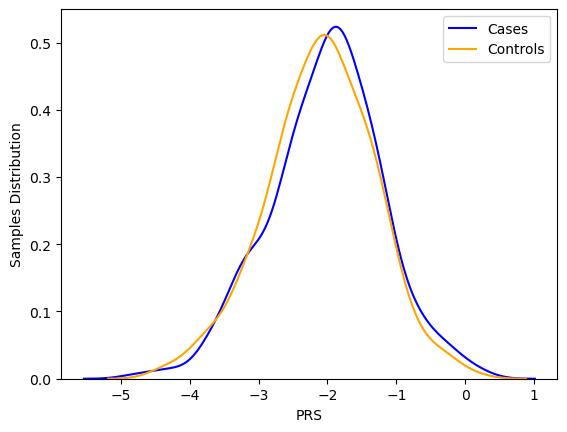

In [59]:
# Plot the distribution of cases
ax = sns.distplot(prs_cases[0], kde=True, color='blue', hist=False)

# Plot the distribution of controls
ax = sns.distplot(prs_control[0], kde=True, color='orange', hist=False)

ax.set(xlabel='PRS', ylabel='Samples Distribution')

# Show the plot
plt.legend(['Cases', 'Controls'])
plt.show()

## PRS ROC curve

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

In [61]:
prs[0]

Sample_62     -1.143
Sample_1029   -1.780
Sample_821    -2.616
Sample_56     -1.682
Sample_47     -1.302
               ...  
Sample_160    -1.774
Sample_443    -1.981
Sample_326    -2.943
Sample_1080   -2.139
Sample_1323   -1.190
Name: 0, Length: 1092, dtype: float64

In [62]:
# AUC ˜0.5 suggests no discrimination
roc_auc_score(prs['group'], prs[0])

0.531104058124154

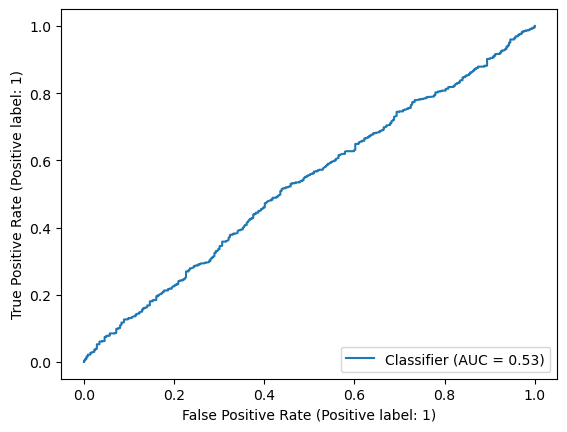

In [63]:
RocCurveDisplay.from_predictions(prs['group'], prs[0])